In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from utils import extract_frame

In [3]:
filepath = './data/problem_1.mp4'
invGamma = 1.0 / 2.7
beta = 0.85
table = np.array([beta*((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype(np.uint8)
cap = cv2.VideoCapture(filepath)
if (cap.isOpened()== False): 
        print("Error opening video stream or file")    
while(cap.isOpened()):
    try:
        ret, frame = cap.read()
        frame = cv2.resize(frame, (1200,600))
        frame = cv2.LUT(frame,table)
        frame = cv2.GaussianBlur(frame, (5,5),2)
        frame = cv2.medianBlur(frame,11)
        cv2.imshow('frame', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    except Exception as e:
        print(e)
        break
cv2.destroyAllWindows()

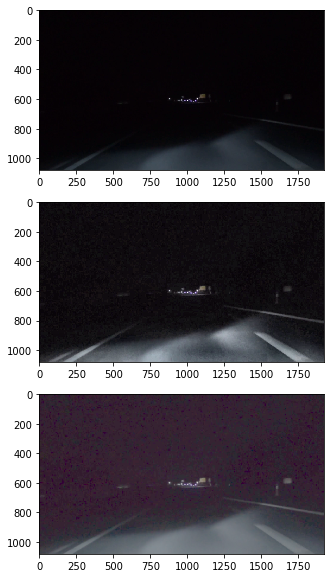

(1080, 1920, 3)

In [9]:
img = extract_frame('../data/problem_1.mp4', 100)
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)


invGamma = 1.0 / 2.7
beta = 0.85
table = np.array([beta*((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype(np.uint8)
frame = cv2.LUT(img,table)
frame = cv2.GaussianBlur(frame, (5,5),2)

plt.figure(figsize=(10,10))
plt.subplot(311)
plt.imshow(img)
plt.subplot(312)
plt.imshow(img_output)
plt.subplot(313)
plt.imshow(frame)
plt.show()
frame.shape

In [10]:
C = cv2.VideoCapture('../data/problem_1.mp4')
out = cv2.VideoWriter('problem1.mp4', cv2.VideoWriter_fourcc(*'MP4V') , 15, (1920,1080))
# K,D,crop,dest, src = problem[2]
# frame = 0
while 1:
        ret, image = C.read()
#         frame+=1
        if ret == True:
            img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

            clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
            img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])

            # convert the YUV image back to RGB format
            image = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

#             print(frame, end='\r')
#             cv2.imshow('img', image)
            out.write(image)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                    break
        else:
            break
C.release()
out.release()
cv2.destroyAllWindows()
    